# Visualizing distributions of data

데이터를 분석하거나 모델링하려는 모든 노력의 초기 단계는 변수가 어떻게 분포되어 있는지 이해하는 것이어야 한다. 분포 시각화 기법은 여러 가지 중요한 질문에 대한 빠른 답을 제공할 수 있다. 
* 관찰 범위는 어느 정도인가? 중심 경향은 무엇인가? 한 방향으로 심하게 치우쳐 있는가? 
* 바이모달리티에 대한 증거가 있는가? 유의미한 이상값이 있는가? 
* 이러한 질문에 대한 답이 다른 변수에 의해 정의된 하위 집합에 따라 달라지는가?
<br/><br/>
분포 모듈에는 이와 같은 질문에 답하도록 설계된 여러 함수가 포함되어 있다. 축 수준 함수는 histplot(), kdeplot(), ecdfplot() 및 rugplot()이다. 이러한 함수는 그림 수준인 displot(), jointplot() 및 pairplot() 함수 내에서 함께 그룹화된다.

분포를 시각화하는 데는 여러 가지 접근 방식이 있으며, 각 접근 방식에는 상대적인 장단점이 있다. 특정 목적에 가장 적합한 접근 방식을 선택할 수 있도록 이러한 요소를 이해하는 것이 중요하다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plotting univariate histograms
분포를 시각화하는 가장 일반적인 접근 방식은 히스토그램일 것이다. 히스토그램은 displot()의 기본 접근 방식으로, 히스토그램은 histplot()과 동일한 기본 코드를 사용한다. 히스토그램은 데이터 변수를 나타내는 축을 불연속 구간차원 집합으로 나누고 각 구간차원에 속하는 관측값의 개수를 해당 막대의 높이를 사용하여 표시하는 막대형 차트이다.

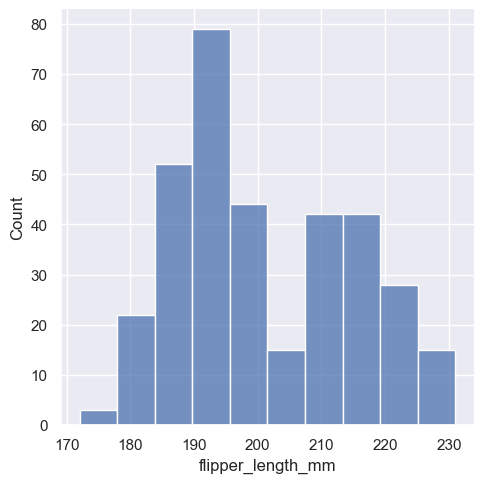

In [2]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

이 플롯은 flipper_length_mm 변수에 대한 몇 가지 인사이트를 즉시 제공한다. 예를 들어, 가장 일반적인 플리퍼 길이는 약 195mm이지만 분포가 이원형으로 나타나므로 이 한 가지 숫자로는 데이터를 잘 나타내지 못한다는 것을 알 수 있다.

# Choosing the bin size
구간차원의 크기는 중요한 매개 변수이며, 잘못된 구간차원 크기를 사용하면 데이터의 중요한 특징이 가려지거나 임의의 변동성으로 인해 명백한 특징이 만들어져 오해의 소지가 있을 수 있다. 기본적으로 displot()/histplot()은 데이터의 분산과 관찰 횟수를 기준으로 기본 구간차원 크기를 선택한다. 그러나 이러한 자동 접근 방식은 데이터 구조에 대한 특정 가정에 의존하기 때문에 지나치게 의존해서는 안 된다. 항상 다양한 구간차원 크기에서 분포에 대한 노출이 일관성이 있는지 확인하는 것이 좋다. 크기를 직접 선택하려면 빈폭 매개변수를 설정한다

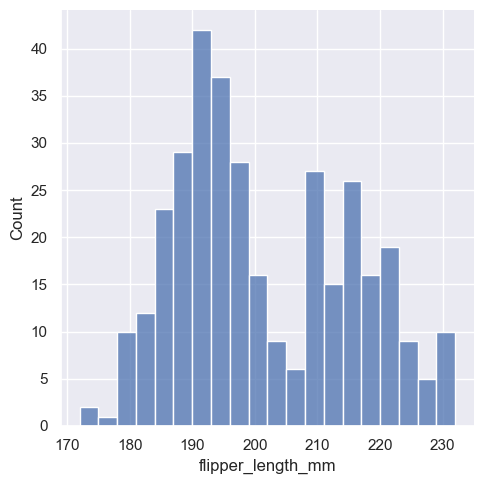

In [2]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

다른 상황에서는 크기보다는 bins의 개수를 지정하는 것이 더 합리적일 수 있다.

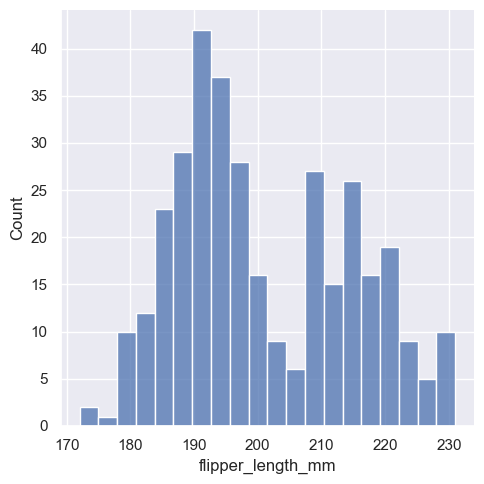

In [3]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

기본값이 실패하는 상황의 한 가지 예는 변수가 상대적으로 적은 수의 정수 값을 사용하는 경우이다. 이 경우 기본 구간차원 너비가 너무 작아 분포에 어색한 간격이 생길 수 있다

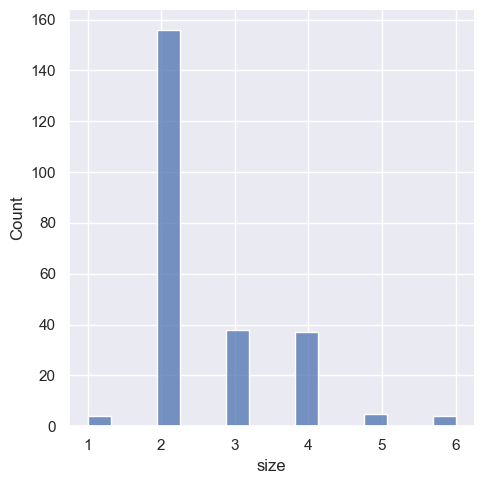

In [4]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

한 가지 방법은 빈에 배열을 전달하여 정확한 bins 나누기를 지정하는 것이다.

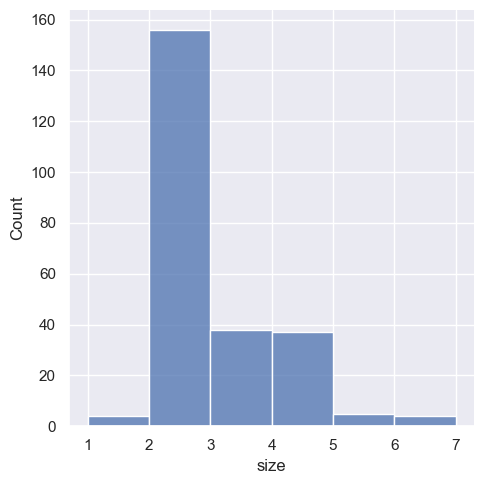

In [5]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

discrete=True를 설정하여 데이터 집합의 고유 값을 나타내는 구간차원 나누기를 해당 값을 중심으로 막대가 있는 막대로 선택할 수도 있다.

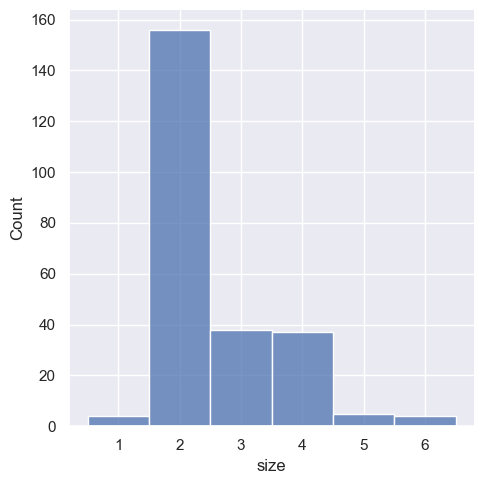

In [6]:
sns.displot(tips, x="size", discrete=True)

히스토그램의 논리를 사용하여 범주형 변수의 분포를 시각화할 수도 있다. 범주형 변수의 경우 불연속형 구간차원이 자동으로 설정되지만, 축의 범주적 특성을 강조하기 위해 막대를 약간 '축소'하는 것도 도움이 될 수 있다.

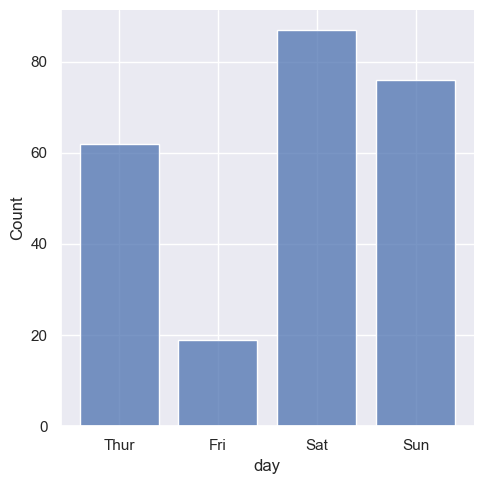

In [7]:
sns.displot(tips, x="day", shrink=.8)

# Conditioning on other variables
변수의 분포를 이해했다면, 다음 단계는 데이터 집합의 다른 변수에 따라 해당 분포의 특징이 다른지 물어보는 것이다. 예를 들어, 위에서 본 플리퍼 길이의 bimodal 분포를 설명하는 것은 무엇일까? displot() 및 histplot() 함수는 색조 시맨틱을 통해 조건부 하위 집합을 지원한다. 색조에 변수를 할당하면 각각의 고유 값에 대해 별도의 히스토그램이 그려지고 색상으로 구분된다.

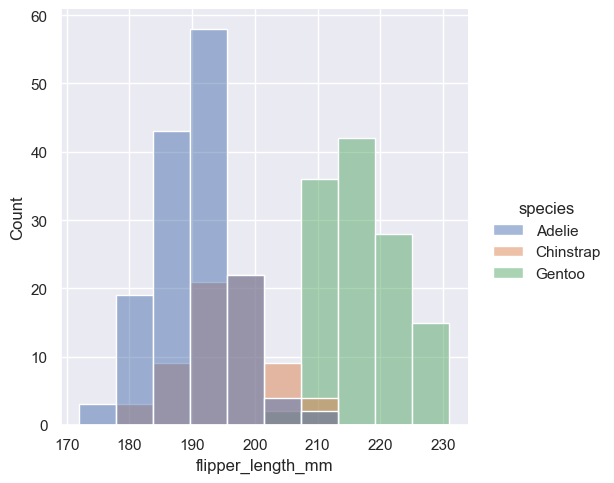

In [2]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm", hue="species")

기본적으로 서로 다른 히스토그램은 서로 위에 '겹쳐져' 표시되며 경우에 따라 구분하기 어려울 수 있다. 한 가지 옵션은 히스토그램의 시각적 표현을 막대형 플롯에서 '단계형' 플롯으로 변경하는 것이다.

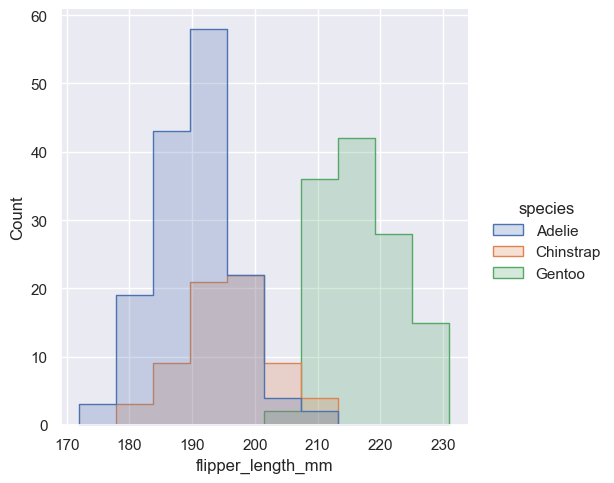

In [3]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

또는 각 막대를 겹겹이 쌓는 대신 "스택"하거나 수직으로 이동할 수 있다. 이 플롯에서는 전체 히스토그램의 윤곽이 단일 변수만 있는 플롯과 일치한다.

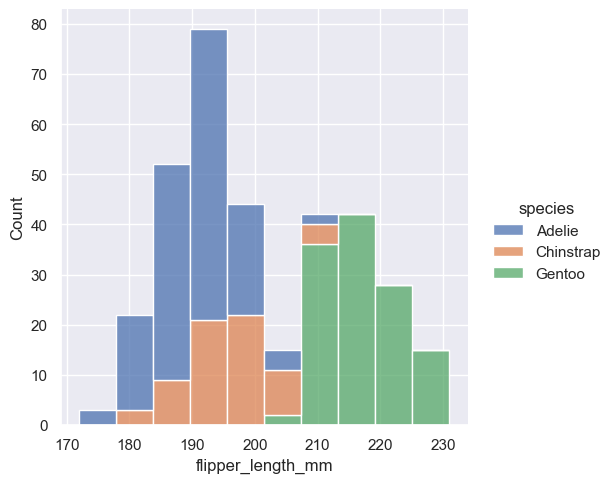

In [4]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

누적 히스토그램은 변수 간의 부분과 전체 관계를 강조하지만 다른 특징을 가릴 수 있다(예: 아델리 분포의 모드를 파악하기 어렵다). 또 다른 옵션은 막대를 가로로 이동하고 너비를 줄이는 'dodge'이다. 이렇게 하면 겹치는 부분이 없고 막대의 높이가 비슷하게 유지된다. 그러나 범주형 변수의 수준 수가 적은 경우에만 잘 작동한다.

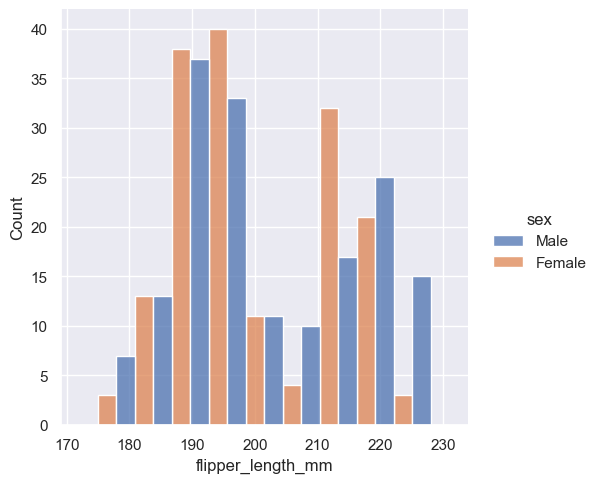

In [5]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

displot()은 그림 수준 함수이고 FacetGrid에 그려지기 때문에 두 번째 변수를 색조 대신(또는 색조와 함께) 열이나 행에 할당하여 각각의 개별 분포를 별도의 하위 플롯에 그릴 수도 있다. 이렇게 하면 각 하위 집합의 분포를 잘 나타내지만 직접 비교하기는 더 어렵다.

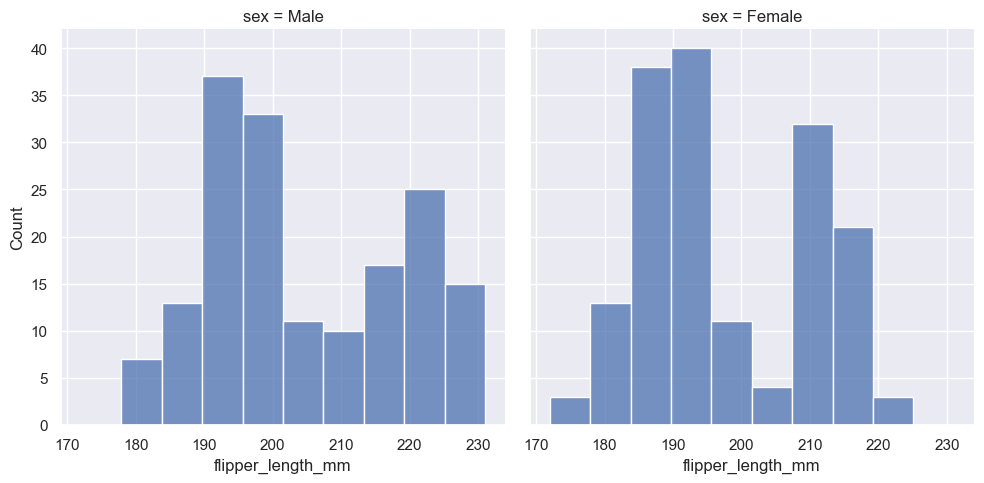

In [6]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

이러한 접근 방식 중 어느 것도 완벽하지는 않으며, 곧 비교 작업에 더 적합한 히스토그램에 대한 몇 가지 대안을 보게 될 것이다.